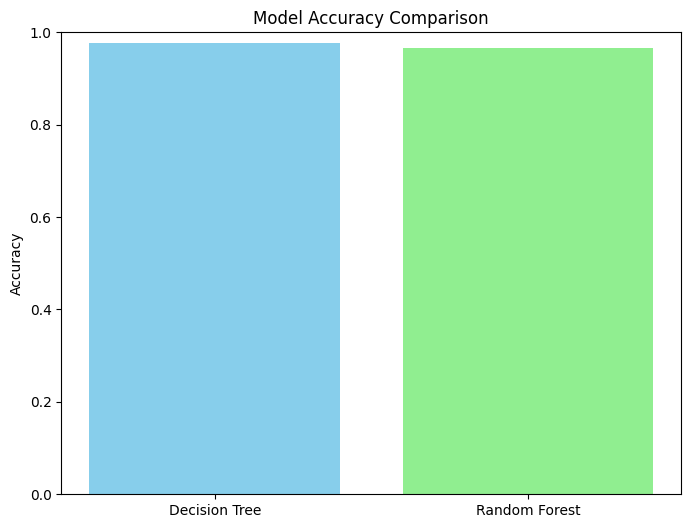

Confusion Matrix: Decision Tree


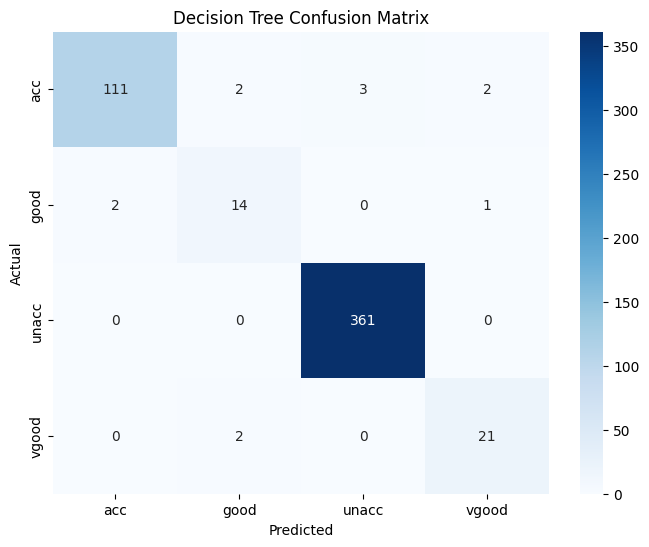

Confusion Matrix: Random Forest


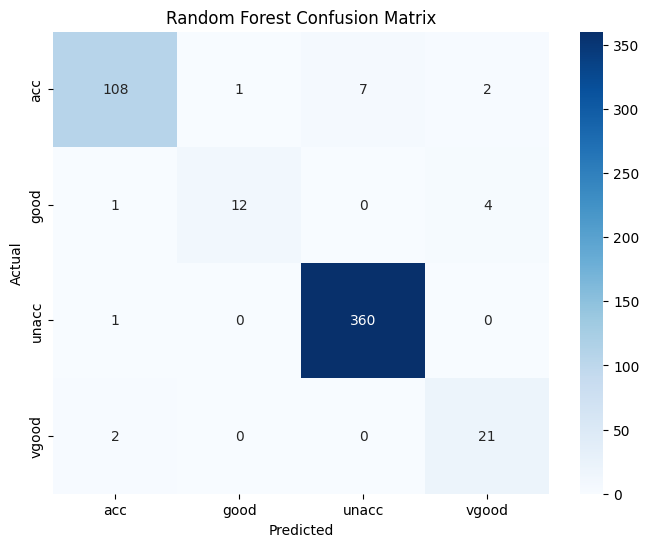

<ipython-input-2-0636e6f3d0a9>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


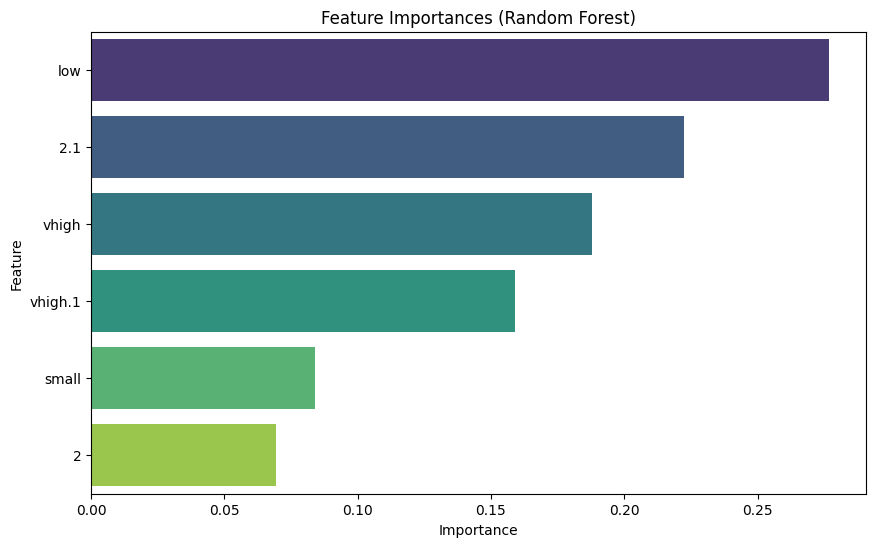

Decision Tree Accuracy: 0.976878612716763
Random Forest Accuracy: 0.9653179190751445
더 나은 성능을 보인 모델: Decision Tree


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data = pd.read_csv('car_evaluation.csv')

# 범주형 데이터를 숫자로 변환
label_encoders = {}
for col in data.columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# 독립변수와 종속변수 분리
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# 데이터 분할(7:3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 모델 학습: 의사결정트리
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

# 모델 학습: 랜덤포레스트
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

# 결과 시각화: 정확도 비교
models = ['Decision Tree', 'Random Forest']
accuracies = [dt_accuracy, rf_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightgreen'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()

#혼돈행
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders[data.columns[-1]].classes_, yticklabels=label_encoders[data.columns[-1]].classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

print("Confusion Matrix: Decision Tree")
plot_confusion_matrix(y_test, dt_pred, 'Decision Tree Confusion Matrix')

print("Confusion Matrix: Random Forest")
plot_confusion_matrix(y_test, rf_pred, 'Random Forest Confusion Matrix')

# 특성 중요도 시각화: 랜덤포레스트
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# 결과 출력
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)

# 두 모델 중 성능이 우수한 모델
better_model = 'Random Forest' if rf_accuracy > dt_accuracy else 'Decision Tree'
print(f"더 나은 성능을 보인 모델: {better_model}")
